### Setup and Imports

In this section, we install necessary packages and import required modules.

In [1]:
!pip install -Uqq fastbook
!pip install -Uq transformers

# Importing required modules
import pandas as pd
from fastbook import *
from fastai.text.all import *
from transformers import GPT2LMHeadModel, GPT2TokenizerFast

# Setting up fastbook
import fastbook
fastbook.setup_book()

### Custom Tokenizer

Define a custom tokenizer for the Transformers model.

In [2]:
class TransformersTokenizer(Transform):
    """Custom tokenizer for Transformers model."""
    def __init__(self, tokenizer): 
        self.tokenizer = tokenizer
    def encodes(self, x): 
        toks = self.tokenizer.tokenize(x)
        return tensor(self.tokenizer.convert_tokens_to_ids(toks))
    def decodes(self, x): 
        return TitledStr(self.tokenizer.decode(x.cpu().numpy()))

### Load, Explore and Clean the Dataset

Here, we load the dataset containing poems and print out the number of poems in the dataset.

In [3]:
# Define the remove_non_english function
def remove_non_english(text):
    # Regular expression to remove non-English alphabet characters
    english_only = re.sub(r'[^a-zA-Z\s.,;?!\'-]', '', text)
    return english_only

# Define the create_corpus function
def create_corpus(text):
    # Tokenize text into sentences
    sentences = text.split('\n')
    # Remove empty strings
    sentences = [sentence.strip() for sentence in sentences if sentence.strip()]
    # Join sentences into a corpus
    corpus = '\n'.join(sentences)  # Keep newline characters
    return corpus

In [4]:
path = '/kaggle/input/poem-classification-dataset/data.csv'
poems_dataframe = pd.read_csv(path)

print("There are", len(poems_dataframe['poem']),"poems in the dataset")

There are 10064 poems in the dataset


In [5]:
# Apply remove_non_english function to poem column
#poems_dataframe['poem'] = poems_dataframe['poem'].apply(remove_non_english)

# Remove \xa0
#poems_dataframe['poem'] = poems_dataframe['poem'].str.replace('\xa0', '')

# Apply lowercase to the poem column
#poems_dataframe['poem'] = poems_dataframe['poem'].str.lower()

# Print the DataFrame
poems_dataframe

,Unnamed: 0,poem,topic
0,0,Sunday we lay hands\non a girl of ten hand on hand on\ncornsilk hair. We sing\nthe secret language sung\nthe day the tin roof of the tower beat\non God’s floorboard\nhe got cramp in heaven.\nLike our crying and our\nfornicating so close to his bed\nwas so many shrill mice in a pretty\npine floor. To heal\nthe girl with the crippled up leg\nGod sends back the song\nhe took and down it comes\ncontrary in one mouth as fire\ngentle on our bodies as rain.\nSoft rain swells the Cumberland\nand all her fields in April nuzzles\nbuttercups the mules won’t touch\nthe crowpoison the wake-robin\nthe b...,religion
1,1,"O transient voyager of heaven!\n⁠ ⁠ ⁠ O silent sign of winter skies!\nWhat adverse wind thy sail has driven\n⁠ ⁠ ⁠ To dungeons where a prisoner lies?\n\nMethinks the hands that shut the sun\n⁠ ⁠ ⁠ ⁠So sternly from this morning's brow\nMight still their rebel task have done\n⁠⁠ ⁠ ⁠ And checked a thing so frail as thou.\n\nThey would have done it had they known\n⁠ ⁠ ⁠ ⁠The talisman that dwelt in thee,\nFor all the suns that ever shone\n⁠ ⁠ ⁠ ⁠Have never been so kind to me!\n\nFor many a week, and many a day\n⁠⁠ ⁠ ⁠ My heart was weighed with sinking gloom\nWhen morning rose in mourning grey\n...",religion
2,2,"\n\n\na cento for Sarah Hegazy\n\n\n\n\na cento for Sarah Hegazy\n\na cento for Sarah HegazyIn the hiding\nhour of autophagy\nghosts hang out all day and talk to us.\nAn archival haunting demanding tribute:\n half a lime for breakfast every day.\nبشرٌ يئنّونَ من الألمِ\nhuman voices keening in pain\nتُشعلُ أجسادَهُمَ النارُ\ntheir bodies, consumed by fire\nlight up the dark\n.فيضيئوا العتمةَ\n\nThey will blame the early morning hours\nفي طَيّ الكُتْمانِ: under the seal of secrecy\nwhere there was no sunrise\n though\nmoon tells me god is love unconditional. I\n\nten thousand years ...",religion
3,3,"I am in the middle of “The Fourteen Poems"" by Sun Bu-er (“Clear and Calm Free Human”), Taoist and one of the Seven Immortal Sisters who took up the Tao after she turned fifty-one, after her three children grew up, after her husband attained enlightenment—highly approved by The Complete Reality School. She was born in 1124. Commentary by Chen Yingning of the twelfth century. Translated by Thomas Clearly. Copyright 1989. The Chinese is not included.The secret texts may reveal how to really be alive. Those by Sun Bu-er are said to have been handed on by revered Taoist; one of whom was known a...",religion
4,4,"I lift him out, whole and perfect.\nSaid told me he would be here, chained by Dante\nTo the eighth circle of hell, bettered only by the devil himself.\nThe Paris Review recapped this canto in 2014, saying\nRead along! This week: Mohammed torn asunder.\nAnd so he was, again, “cleft from chin to colon.” In summary\nWe are assured this is a marvelous mangling.\nI cannot abide (t)his pain. I have taken him out,\nWounding the text, the ancient imagining,\nAnd write myself into it so asunder I tear,\nGuts and shit spilling down my legs. Omar,\nFoolish provocateur, no prophet, but sower\nOf schis...",religion
...,...,...,...
10059,10059,"As the light goes, go. \nBe the rustling in the grass, the fall from \nconvention's good graces: learn, or someone \nwill have you filing files or writing writs, \ndemonstrating cutlery or selling knowledge \n\ndoor to door; someone might even drop \nyour lovely life into a factory and have you \nderusting rings on the coolant-spouting \nturntable of a vertical lathe. \nIt's best for everyone that what you know \n\nis generally thought of as general knowledge. \nYou can find it in pool rooms and roadside bars, \nin meadows as inviting as beds, in bedrooms \nwhere it whispers like a ribbon ...",arts&sciences
10060,10060,"Isn't the moon dark too, most of the time? And doesn't the white page seem unfinished without the dark stain of alphabets? When God demanded light, he didn't banish darkness. Instead he invented ebony and crows and that small mole on your left cheekbone.

In [6]:
all_poems = L(poems_dataframe['poem'].tolist())

### Tokenization and Data Loading

Tokenize the poems and set up the data loaders.

In [7]:
tokenizer = GPT2TokenizerFast.from_pretrained('gpt2')
splits = [range_of(80), range(100)] # use a 80/20 split

tls = TfmdLists(all_poems, TransformersTokenizer(tokenizer), splits=splits, dl_type=LMDataLoader)

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

/opt/conda/lib/python3.10/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

### Display Tokenized Text

Display a tokenized sample from the training dataset.

In [8]:
show_at(tls.train, 0)

Sunday we lay hands
on a girl of ten hand on hand on
cornsilk hair. We sing
the secret language sung
the day the tin roof of the tower beat
on God’s floorboard
he got cramp in heaven.
Like our crying and our
fornicating so close to his bed
was so many shrill mice in a pretty
pine floor. To heal
the girl with the crippled up leg
God sends back the song
he took and down it comes
contrary in one mouth as fire
gentle on our bodies as rain.
Soft rain swells the Cumberland
and all her fields in April nuzzles
buttercups the mules won’t touch
the crowpoison the wake-robin
the bluets of the field.
Every song got a beat beneath.
Start with the whippoorwill
early meadow colors creep
into the sky. My sons made this
tobacco sled I prime with the jenny
toss the last of the sandlugs for the rest
to thrive. So hot the wasps hang on the honeysuckle
too spent to buzz a sermon.
I know my song remembers
what my fathers told their strings.
Driskill, KentuckyDriskill, Kentucky


### DataLoaders Setup

Set up the DataLoaders with batch size and sequence length.

In [9]:
bs,sl = 4,256
dls = tls.dataloaders(bs=bs, seq_len=sl, shuffle=True)

Token indices sequence length is longer than the specified maximum sequence length for this model (1456 > 1024). Running this sequence through the model will result in indexing errors


### Display Batch

Display a batch of tokenized text.

In [10]:
dls.show_batch(max_n=3)

,text,text_
0,"Summers meant sticking my arm out the back of a rez car.\nNo other windows rolled down.\nConsequences of a mechanic, some stranger’s\ncalloused hands left us with sticky summers, sweat\ndripping from our foreheads.\n\nI waved to make-believe\nfriends and hungry ghosts. My arms danced\nagainst the wind, taking comfort in\nthe resistance of warm desert air.\n\nThe ghosts sang along as Journey’s\nkeys and bass blared through\na battery-powered boombox.\nThe car hugged the highway curves like a child\nholding its mom’s hand, afraid to walk alone in the dark.\n\nOur grandmothers told us stories of the desert,\nhow giant serpents laid on mountains\nto create canyons. Imagine earth crunching\nunder the weight of unbearable sadness.\nImagine what it feels like to collapse\ninto an uncharted territory of grief.\n\nAs young girls we learned the tale\nof a mother who cried so many tears\nshe created a lake in the middle of the desert.\nToday she sits in stone beneath a star-stitched sky,\nholding up the otherwise untethered blue.\n\nLast","mers meant sticking my arm out the back of a rez car.\nNo other windows rolled down.\nConsequences of a mechanic, some stranger’s\ncalloused hands left us with sticky summers, sweat\ndripping from our foreheads.\n\nI waved to make-believe\nfriends and hungry ghosts. My arms danced\nagainst the wind, taking comfort in\nthe resistance of warm desert air.\n\nThe ghosts sang along as Journey’s\nkeys and bass blared through\na battery-powered boombox.\nThe car hugged the highway curves like a child\nholding its mom’s hand, afraid to walk alone in the dark.\n\nOur grandmothers told us stories of the desert,\nhow giant serpents laid on mountains\nto create canyons. Imagine earth crunching\nunder the weight of unbearable sadness.\nImagine what it feels like to collapse\ninto an uncharted territory of grief.\n\nAs young girls we learned the tale\nof a mother who cried so many tears\nshe created a lake in the middle of the desert.\nToday she sits in stone beneath a star-stitched sky,\nholding up the otherwise untethered blue.\n\nLast month"
1,"wisnesse, recorde þus wiþ truþe\nThat hir peyne be perpetuel and no preiere hem helpe. |\nForþi lat hem chewe as þei chosen, and chide we noȝt, sustres,\nFor it is botelees bale, þe byte þat þei eten.’\n’And I shal preue,’ quod Pees, ’hir peyne moot haue ende,\nAnd wo into wele mowe wenden at þe laste.\nFor hadde þei wist of no wo, wele hadde þei noȝt knowen;\nFor no wight woot what wele is þat neuere wo suffrede,\nNe what is hoot hunger þat hadde neuere defaute.\nIf no nyȝt ne weere, no man as I leeue\nSholde wite witterly what day is to meene.\nSholde neuere riȝt riche man þat lyueþ in reste and ese\nWite","isnesse, recorde þus wiþ truþe\nThat hir peyne be perpetuel and no preiere hem helpe. |\nForþi lat hem chewe as þei chosen, and chide we noȝt, sustres,\nFor it is botelees bale, þe byte þat þei eten.’\n’And I shal preue,’ quod Pees, ’hir peyne moot haue ende,\nAnd wo into wele mowe wenden at þe laste.\nFor hadde þei wist of no wo, wele hadde þei noȝt knowen;\nFor no wight woot what wele is þat neuere wo suffrede,\nNe what is hoot hunger þat hadde neuere defaute.\nIf no nyȝt ne weere, no man as I leeue\nSholde wite witterly what day is to meene.\nSholde neuere riȝt riche man þat lyueþ in reste and ese\nWite what"
2,"​​​​​​ ​​​​​​​My body is rock and dust—\n​​​​​​​ ​​​​​​​​​​​​​​ ​​​​​​​​​​​​​​ I am ascendant—\n\n\n​​​​​​​ ​​​​​​​​​​​​​​ ​​​​​​​​​​​​​​ The sky I want is blue.\n\n\n\n\n\n\n​​​​​​​A Note:\n\nThis cento features at least one line from every writer whose work appears in I Want Sky, a journal the author edited celebrating Sarah Hegazy and queer SWANA life, edited by Bazeed and co-published in 2021 by the Asian American Writers Workshop and Mizna. To name and thank them for words ripe for stealing: ’mad, AMA, Amir Ferdjani, Banah el Ghadbanah, donia salem harhoor, Eman Desouky, Gamal ElSawah, Ghinwa Jawhari, Janine Mogannam, Kamelya Omayma Yous

### Custom Callback

Define a callback to drop output.

In [11]:
class DropOutput(Callback):
    """Callback to drop output."""
    def after_pred(self): 
        self.learn.pred = self.pred[0]

### Model Setup

Set up the GPT-2 language model and the training learner.

In [12]:
model = GPT2LMHeadModel.from_pretrained('gpt2')

learn = Learner(dls, model, loss_func=CrossEntropyLossFlat(), cbs=[DropOutput], metrics=Perplexity()).to_fp16()

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

### Validation

Validate the model.

In [13]:
learn.validate()

(#2) [4.551944255828857,94.81657409667969]

### Learning Rate Finder

Find an optimal learning rate.

SuggestedLRs(valley=0.0005754399462603033)

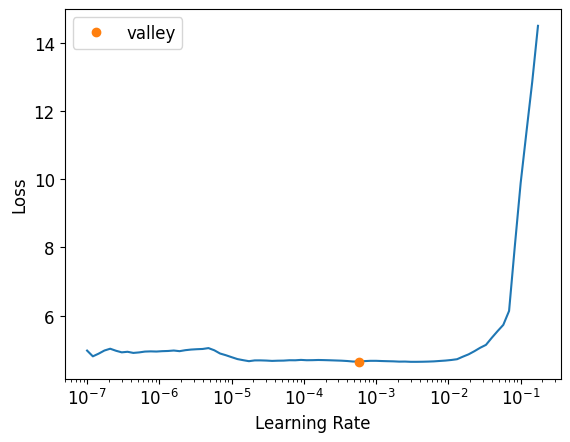

In [14]:
learn.lr_find()

### Model Training

Train the model for 50 epochs.

In [15]:
learn.fit_one_cycle(45, 1e-4)

epoch,train_loss,valid_loss,perplexity,time
0,4.640205,4.338960,76.627815,00:21
1,4.543656,4.224317,68.327827,00:20
2,4.396148,4.092350,59.880474,00:20
3,4.217459,3.948456,51.855255,00:20
4,4.110364,3.819127,45.564419,00:20
5,3.946540,3.688872,39.999687,00:20
6,3.813236,3.572845,35.617783,00:20
7,3.677473,3.406232,30.151423,00:21
8,3.468644,3.237388,25.467106,00:21
9,3.286640,3.067460,21.487257,00:20


### Text Generation Function

Define a function to generate text based on a prompt.

In [16]:
def generate_output_from_text(prompt: str) -> str:
    prompt_ids = tokenizer.encode(prompt)
    inp = tensor(prompt_ids)[None].cuda()
    preds = learn.model.generate(inp, max_length=200, num_beams=5, no_repeat_ngram_size=3, early_stopping=True)
    print("===== Output:======\n")
    output = tokenizer.decode(preds[0].cpu().numpy(), skip_special_tokens=True)
    print(output)

### Text Generation Examples

Generate text based on specific prompts.

In [22]:
generate_output_from_text("love is ridiculous, isn't it?")

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


===== Output:======

love is ridiculous, isn't it? Don’t you know I have called out to God in emptier structures? The answer, from the very beginning, is a resounding "no."
In the forefront
Of the battle,
All is struck down by you—
O winged Lady,
Like a bird
You scavenge the land.
Like the charging storm
You roar at the land,
Snort in rampaging winds.
Your feet are continually restless.
Carrying your harp of sighs,
You breathe out the music of mourning.
 
—

It was in your service
That I first entered
The holy temple,
I, Enheduanna,
The highest priestess.
I carried the ritual basket
And chanted your praise.
Now I have been cast out
To the place of lepers.
Day comes,
And the brightness
Is hidden around me.
Shadows cover


In [18]:
generate_output_from_text("I don't know what I would do")

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


===== Output:======

I don't know what I would do
if I woke up and took a piece of chalk and drew a circle around my body

I would be held to the floor, facing away from the sun.

If I moved forward, forward, and backward,
what would happen to my body if I lost contact with the sun?

What would you call a place where you cannot go,
where the comfort of your loved one is distant,
and where the distance from you to the sun is as great as the wall

Of mourning, of neutrality, is what most mourning seeks

To honor the lives we’ve been given,
to remember those who have been so kind to us,
our long-nosed ladies enduring the singe
of blue magic in our hair,
the fondant layers of Victorian elegance
remembered of the pain of waiting for a married man to ping ping
 on a daguerreotype. 


In [19]:
generate_output_from_text('Among us, you are the one')

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


===== Output:======

Among us, you are the one living
angel of the crooked world.
speak to the voice of the great snail sun whirlwind blood
from the run return and go round scatter
the ends of the earth
return up and down.

I have heard
My times
lips put to silence; a pavilion of tongues.
cut off from eyes: bones roaring all the day long summer.
their works
magnify the exalt together.
matter open wide
clouds like great mountains the fountain of
light shall we see light.
grass-sword heart, time: not again the
seed tree my flesh
before love,

not continually
beauty to consume like a moth: but of the clay,
ears opened from great congregation.
whisper lift
from everlasting to everlasting
meat in praise,
within me: deep call to
deep harp
out arm, and the light
scattered with the forgotten


In [20]:
generate_output_from_text('Long live the king')

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


===== Output:======

Long live the king’s song
and his harp of sighs,
his constant march through the palace
to the balcony, where, amid the bustle of dancers,
hands cupping the air around a fallen form:

          brown and speckled white
          girl bird with entrails as tangled as yarn
          spilling from her center,
          feeding the spent earth beneath

This ancient practice: predicting the future through dreams
is what many ancient Tibetans have been dreaming about

for over twenty years now. In this dream,
I picture the future as bleak and unrelenting
as the present day. Little paper icicles

hang from the air vents—the only Christmas
decoration in here. I strain my eyes to watch
the clothes topple around until the black spaces

become a Jesus face in a pan, moving too fast
and a woman folds a sheet for her reflection
in the glass. Will


In [21]:
generate_output_from_text('I have a dream')

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


===== Output:======

I have a dream that starts in the middle of the night and ends in the morning
I wake up and it’s almost nighttime
I walk into a movie theater
I don’t know where to put my hands
the seats are spread open
I am in a landscape full of mockingbirds
I spread my legs beneath the bathtub faucet
I’m still near enough to see this
I let myself fall
the sky clouds over
the irretrievable yellow
the soft fall
colors lost
shattering
tenacity of white
and the first words of the Torah are inscribed
in the atonement of white

                                                 *

Rabbi of condiments,
whose breath is a verb,
wearing a thin beard
and a white robe;
you who are pale and small
and shaped like a fist,
a synagogue,
bless our bitterness,

